# Problem 3 Nonparametric Confidence Band For eCDF

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
raw_data = np.loadtxt("fiji.txt")
head = ["latitude", "longitude", "depth", "magnitude", "number of reporting"]
data = pd.DataFrame(raw_data[:,1:], index=pd.Series(raw_data[:,0]).astype("int32"), columns=head)
data.head()

,latitude,longitude,depth,magnitude,number of reporting
1,-20.42,181.62,562.0,4.8,41.0
2,-20.62,181.03,650.0,4.2,15.0
3,-26.00,184.10,42.0,5.4,43.0
4,-17.97,181.66,626.0,4.1,19.0
5,-20.42,181.96,649.0,4.0,11.0


### (a)
$n = 1000$

$\hat F_n(x) = \frac{1}{n}\sum_{i=1}^{n} H(x-X_i)$

$\hat{\text{se}}[\hat F_n(x)]= \sqrt{\frac{\hat F_n(x)\left(1-\hat F_n(x)\right)}{n}}$

The 95% confidence band is between $\hat F_n(x)-1.96\times \hat{\text{se}}[\hat F_n(x)]$ and $\hat F_n(x)+1.96\times \hat{\text{se}}[\hat F_n(x)]$

In [85]:
n = 1000

def Fhat(x):
    sample = data["magnitude"]
    return sum(sample < x) / len(sample)

def se_Fhat(x):
    return np.sqrt(Fhat(x) * (1-Fhat(x)) / n)

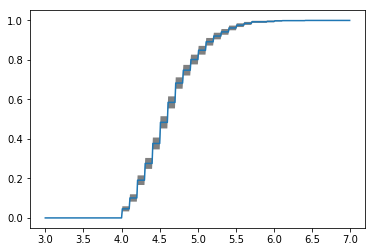

In [73]:
x = np.arange(3,7,0.01)
plt.plot(x, [Fhat(xi) for xi in x])
plt.fill_between(x, [Fhat(xi) - 1.96 * se_Fhat(xi) for xi in x], [Fhat(xi) + 1.96 * se_Fhat(xi) for xi in x], facecolor="grey")
plt.show()

### (b)

In [104]:
def Fhat_smooth(x):
    x1, x2 = int(x*10) / 10, int(x*10+1) / 10
    return Fhat(x1) + (Fhat(x2) - Fhat(x1)) / (x2 - x1) * (x - x1)

def se_Fhat_smooth(x):
    return np.sqrt(Fhat_smooth(x) * (1-Fhat_smooth(x)) / n)

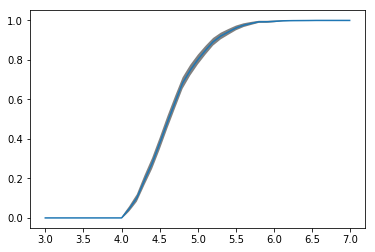

In [105]:
x = np.arange(3,7,0.01)
plt.plot(x, [Fhat_smooth(xi) for xi in x])
plt.fill_between(x, [Fhat_smooth(xi) - 1.96 * se_Fhat_smooth(xi) for xi in x], [Fhat_smooth(xi) + 1.96 * se_Fhat_smooth(xi) for xi in x], facecolor="grey")
plt.show()